In [2]:
# import pymssql
# import pymysql
import time
import datetime
import numpy as np
from datetime import datetime as dt
from tqdm import *
from datetime import datetime as dt
from tqdm import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
data = pd.read_pickle('./data/new_data/044A09.M15117粉尘.all.pickle')

In [126]:
# plt.plot(data['Time'],data['MonitorValue'])
def remove_notnormal(df):
    cols = ['MonitorValue']
    for c in cols:
        a = df[c]
        a[a>90] = np.NaN
        df[c] = a.fillna(method='ffill')
    return df
data = remove_notnormal(data)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [196]:
data['Time'] = data['Time'].apply(lambda x: pd.Timestamp(x))
data = data[(data['Time'] >= pd.Timestamp('2017-09-15 00:00:00')) & (data['Time'] <= pd.Timestamp('2018-05-01 00:00:00'))]

In [197]:

import time, datetime
from datetime import date, datetime, timedelta

def parse_timestamp(t):
    DT_FORMAT='%Y-%m-%d %H:%M:%S'
    return datetime.strptime(t, DT_FORMAT)
def get_unixstamp(t):
    return int(time.mktime(t.timetuple()))



def resample(data):
    start_u = get_unixstamp(parse_timestamp('2017-09-15 00:00:00'))
    inter = 120

    def get_index(t):
#         t = t.to_datetime()
        t_count = get_unixstamp(t) - start_u
        n = t_count // inter * inter + start_u
        return pd.Timestamp(datetime.fromtimestamp(n))

    data['filter_minute'] = data['Time'].apply(get_index)
    temp_data = data.groupby(['filter_minute']).aggregate({'MonitorValue':['mean','max']})
    return temp_data


In [198]:
temp_data = resample(data)

In [199]:
temp_data = temp_data.reset_index()
temp_data['max'] = temp_data['MonitorValue']['max']
temp_data['mean'] = temp_data['MonitorValue']['mean']

In [145]:
temp_data.index.size

118711

In [200]:
def plot_range_date(ori, data, start, end, smooth=False):
    ttime = 'filter_minute'
    oritime = 'Time'
    orival = 'MonitorValue'
    tval = 'max'
    temp_data = data[(data[ttime]>start) & (data[ttime]<end) & (data[tval]<2)]
    ori_data = ori[(ori[oritime]>start) & (ori[oritime]<end) & (ori[orival]<2)]
    time = temp_data[ttime]
    val = temp_data[tval]
    val_mean = temp_data['mean']
    
    otime = ori_data[oritime]
    oval = ori_data[orival] 
    if smooth:
        val = val.rolling(10).max()
    plt.figure(figsize=(20, 5))
    plt.plot(otime, oval, label='origin')
    plt.plot(time, val, label='max')
    plt.plot(time, val_mean, label='mean')
    plt.legend()
    plt.show()

In [16]:
# plot_range_date(data, '2017-07-01 00:00:00', '2018-05-01 00:00:00')

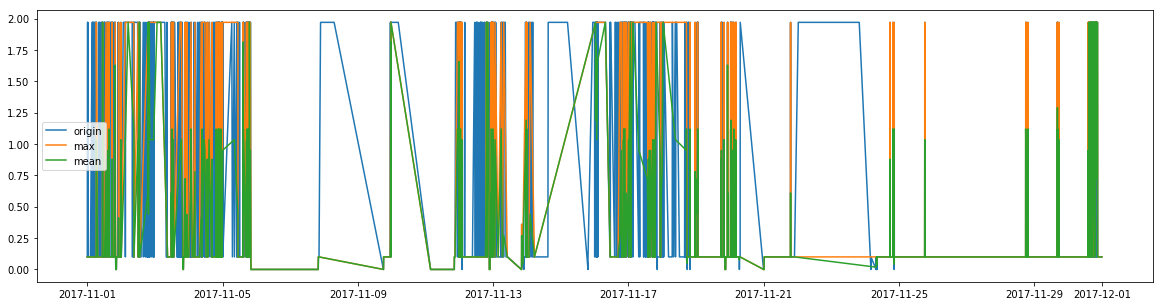

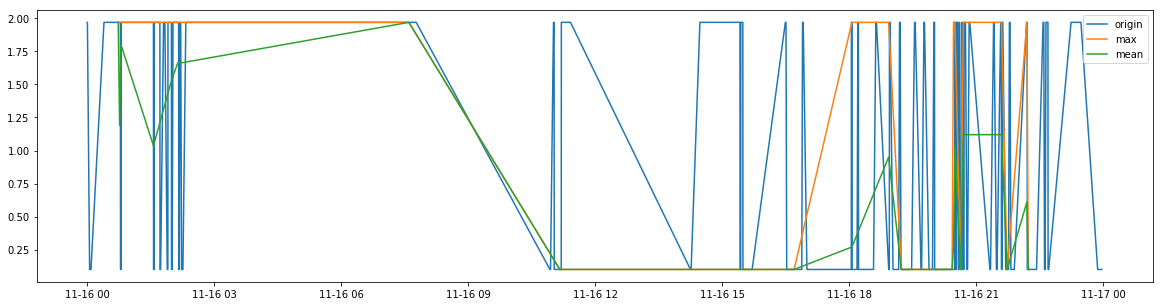

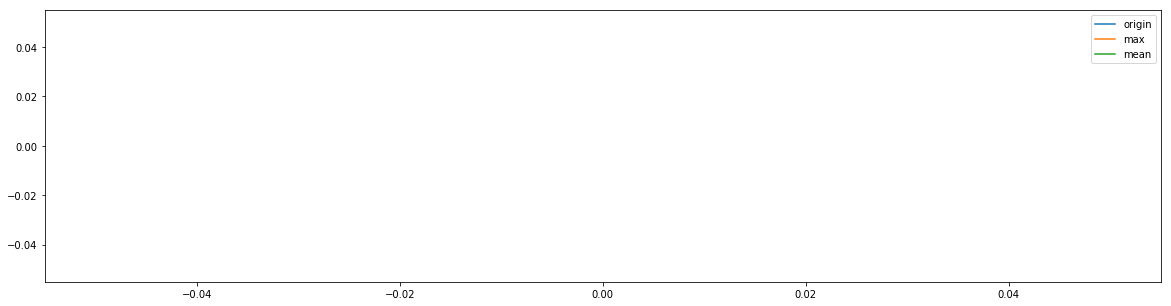

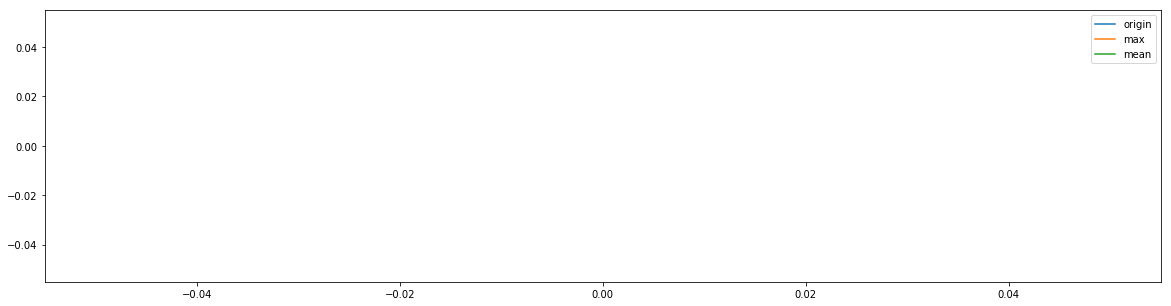

In [201]:
mydata2 = temp_data

smooth = False
plot_range_date(data, mydata2, '2017-11-01 00:00:00', '2017-12-01 00:00:00', smooth)
plot_range_date(data, mydata2, '2017-11-16 00:00:00', '2017-11-17 00:00:00', smooth)
plot_range_date(data, mydata2, '2017-11-16 08:00:00', '2017-11-16 09:00:00', smooth)
plot_range_date(data, mydata2, '2017-11-16 08:00:00', '2017-11-16 08:10:00', smooth)

In [67]:
# plot_range_date(data, mydata,  '2017-07-01 00:00:00', '2018-05-01 00:00:00', smooth)

In [203]:
vals = temp_data.set_index(['filter_minute'])['max']['2017-11-01 00:00:00':'2017-12-01 00:00:00']

In [204]:
res_data = pd.DataFrame(index=None)
res_data['Time'] = temp_data['filter_minute']
res_data['MonitorValue'] = temp_data['mean']
res_data['SensorID'] = '044A09'


In [205]:
res_data = res_data.sort_values(['SensorID','Time']).set_index(['SensorID','Time'])

In [207]:
res_data.to_pickle('./data/mean_2min/044A09.M15117粉尘.2min.mean.pkl')

In [168]:
# import pywt

In [167]:
# db1  = pywt.Wavelet('db3')
# coeffs = pywt.wavedec(vals, db1, level = 3)

In [166]:
# for array in coeffs:
#     plt.figure(figsize=(20, 5))
#     plt.plot(array)
#     plt.show()

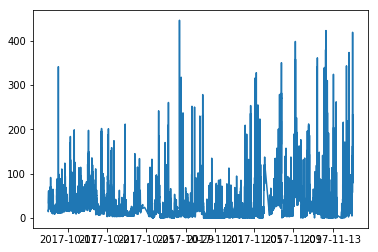

In [206]:
def plot(data,t,c):
    start = pd.Timestamp('2017-10-15 00:00:00')
    end = pd.Timestamp('2017-11-15 01:00:00')
    data = data[(data[t]>=start) & (data[t]<=end)]
    plt.plot(data[t], data[c])
plot(res_data.reset_index(),'Time','MonitorValue')

In [187]:
#以下为粉尘处理
fc1 = pd.read_pickle('./data/new_data/044A05.M15117粉尘1101-1113.pickle')
fc2 = pd.read_pickle('./data/new_data/044A09.M15117粉尘.pickle')

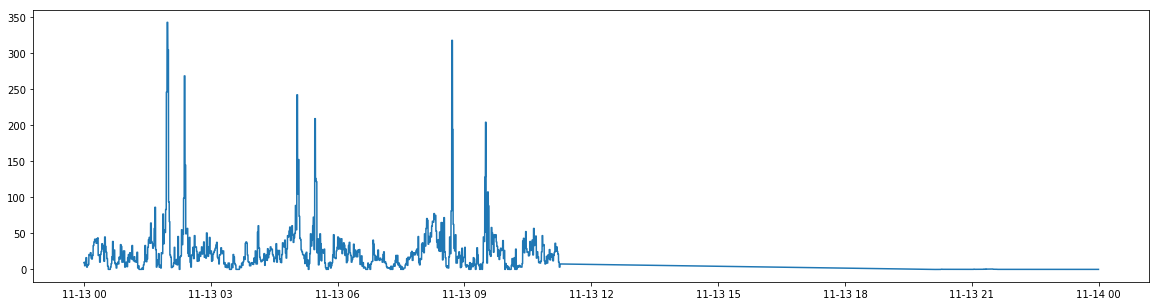

In [176]:
fc=fc1
plt.figure(figsize=(20, 5))
fc = fc[(fc['Time']>=pd.Timestamp('2017-11-13 00:00:00')) & (fc['Time']<=pd.Timestamp('2017-11-14 00:00:00'))]
plt.plot(fc['Time'], fc['MonitorValue'])

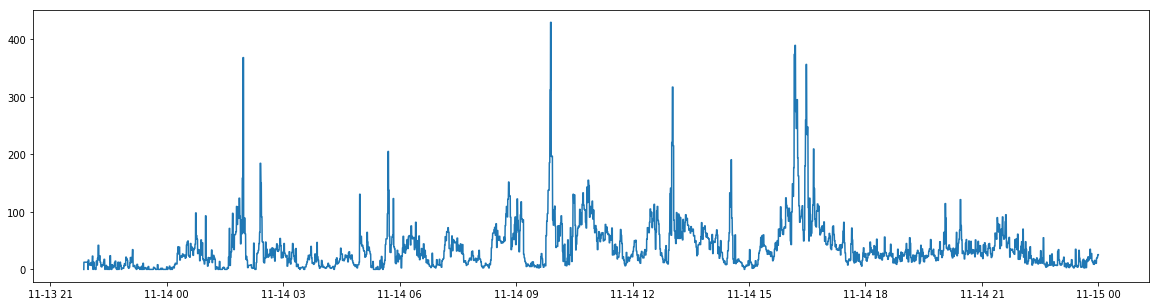

In [178]:
fc=fc2
plt.figure(figsize=(20, 5))
fc = fc[(fc['Time']>=pd.Timestamp('2017-11-13 00:00:00')) & (fc['Time']<=pd.Timestamp('2017-11-15 00:00:00'))]
plt.plot(fc['Time'], fc['MonitorValue'])

In [188]:
fcc = pd.concat([fc1[fc1['Time']<pd.Timestamp('2017-11-13 21:00:00')], 
                fc2[fc2['Time']>=pd.Timestamp('2017-11-13 21:00:00')]])

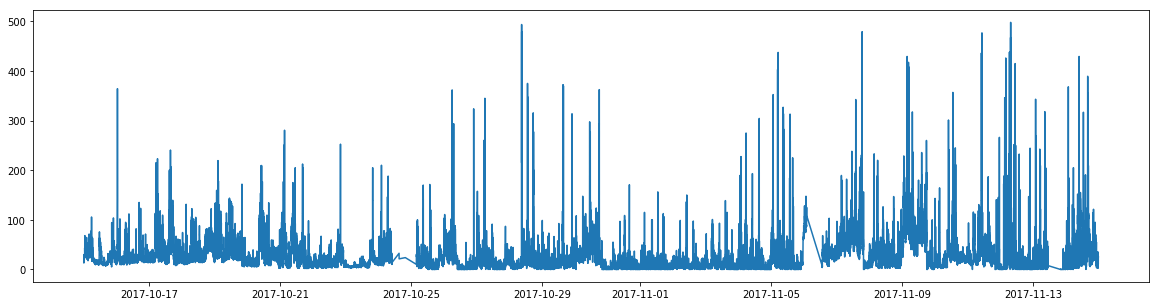

In [193]:
fc=fcc
plt.figure(figsize=(20, 5))
fc = fc[(fc['Time']>=pd.Timestamp('2017-10-15 00:00:00')) & (fc['Time']<=pd.Timestamp('2017-11-15 00:00:00'))]
plt.plot(fc['Time'], fc['MonitorValue'])

In [194]:
fcc.to_pickle('./data/new_data/044A09.M15117粉尘.all.pickle')